Количество дубликатов: 0
Пациентов с диабетом 1 типа: 138
Пациентов с диабетом 2 типа: 130
Здоровых пациентов: 500


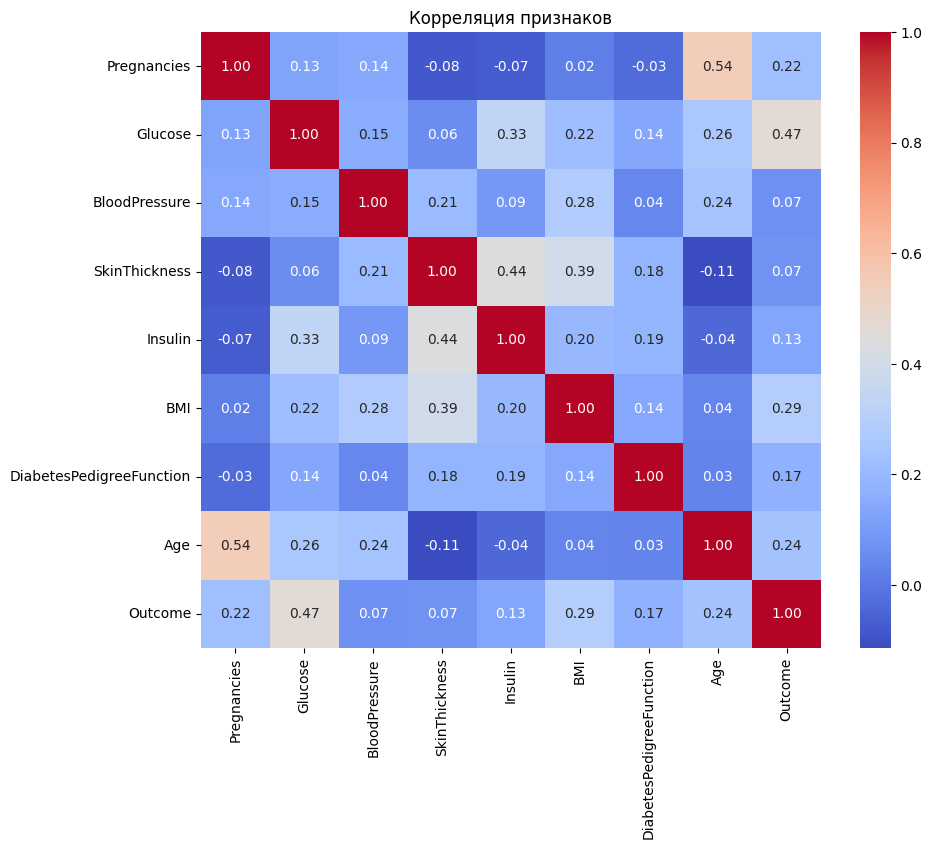

Логистическая регрессия:
Accuracy: 0.71
Precision: 0.61
Recall: 0.52

Случайный лес:
Accuracy: 0.76
Precision: 0.68
Recall: 0.59



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

df = pd.read_csv("diabetes.csv")

duplicates_count = df.duplicated().sum()
print(f"Количество дубликатов: {duplicates_count}")
df = df.drop_duplicates()

df['Insulin_Group'] = df['Insulin'].apply(lambda x: 'Zero' if x == 0 else 'NonZero')

df_type1 = df[(df['Outcome'] == 1) & (df['Insulin'] == 0)]  # Диабет 1 типа
df_type2 = df[(df['Outcome'] == 1) & (df['Insulin'] > 0)]   # Диабет 2 типа
df_no_diabetes = df[df['Outcome'] == 0]  # Без диабета

print(f"Пациентов с диабетом 1 типа: {len(df_type1)}")
print(f"Пациентов с диабетом 2 типа: {len(df_type2)}")
print(f"Здоровых пациентов: {len(df_no_diabetes)}")

plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляция признаков")
plt.show()

X = df.drop(columns=['Outcome', 'Insulin_Group'])
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

def calculate_metrics(y_true, y_pred, model_name):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0

    print(f"{model_name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}\n")

calculate_metrics(y_test, y_pred_log, "Логистическая регрессия")
calculate_metrics(y_test, y_pred_rf, "Случайный лес")